In [ ]:
# Disaster tweets classification using text mining and classification algorithms

In [1]:
# Read clean and vectorize the data
import pandas as pd
import numpy as np
import string
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Reading the raw file and defining the clean text function

#pd.set_option('display.max_colwidth',100)
data = pd.read_csv("train.csv")
#data.columns = ['label','body_text']
#print(data.head())


# Cleaning the text

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()


def clean_text(text):
    text = "".join([char for char in text if char not in string.punctuation]) # Removing punctuations
    tokens = re.split('\W+', text) # Tokenizing the words
    text = ([word for word in tokens if word not in nltk.corpus.stopwords.words("English")]) # remmoving stopwords
    #text = [wn.lemmatize(word) for word in text]   
    text = [ps.stem(word) for word in text] 
    return(text)

### Adding features columns

#### Hypothesis is that spam messages have less length and more punctuations

In [4]:
# Counting the percent of punctuations

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round((count/(len(text)-text.count(" "))),3)*100

# Counting the length
data['body_len'] = data['text'].apply(lambda x: len(x) - x.count(" "))

# Adding punctuation percent column
data['body_per_punct'] = data['text'].apply(lambda x: count_punct(x)) 

data = data.replace(np.nan, '', regex=True)
data['text_combined'] =  data['text']+ " " +data['keyword'] 

data.head(80)



,id,keyword,location,text,target,body_len,body_per_punct,text_combined
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,57,1.8,Our Deeds are the Reason of this #earthquake M...
1,4,,,Forest fire near La Ronge Sask. Canada,1,32,3.1,Forest fire near La Ronge Sask. Canada
2,5,,,All residents asked to 'shelter in place' are ...,1,112,2.7,All residents asked to 'shelter in place' are ...
3,6,,,"13,000 people receive #wildfires evacuation or...",1,57,3.5,"13,000 people receive #wildfires evacuation or..."
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,72,2.8,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...,...,...,...,...
75,109,accident,,RT @SleepJunkies: Sleeping pills double your r...,0,79,8.9,RT @SleepJunkies: Sleeping pills double your r...
76,110,accident,Norf Carolina,'By accident' they knew what was gon happen ht...,0,59,11.9,'By accident' they knew what was gon happen ht...
77,112,accident,"San Mateo County, CA",Traffic accident N CABRILLO HWY/MAGELLAN AV MI...,1,59,11.9,Traffic accident N CABRILLO HWY/MAGELLAN AV MI...
78,113,accident,North Carolina,I-77 Mile Marker 31 to 40 South Mooresville I...,1,79,3.8,I-77 Mile Marker 31 to 40 South Mooresville I...


C:\Users\abhi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\abhi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


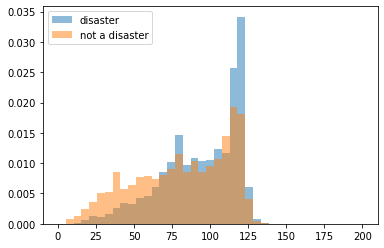

In [5]:
# Checking the features created!

# Length of body text

from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins =  np.linspace(0,200,40)
pyplot.hist(data[data['target']==1]['body_len'], bins, alpha = 0.5, normed = True, label = 'disaster')
pyplot.hist(data[data['target']==0]['body_len'], bins, alpha = 0.5, normed = True, label = 'not a disaster')
pyplot.legend(loc='upper left')



C:\Users\abhi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\abhi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


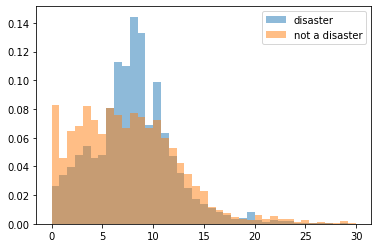

In [6]:
# Number of punctuations

# Percent of punctuations

bins =  np.linspace(0,30,40)
pyplot.hist(data[data['target']==1]['body_per_punct'], bins, alpha = 0.5, normed = True, label = 'disaster')
pyplot.hist(data[data['target']==0]['body_per_punct'], bins, alpha = 0.5, normed = True, label = 'not a disaster')
pyplot.legend(loc='upper right')

### Both of the added features show some promise, disaster tweets are longer and have less punctuations

### Need to scale the features

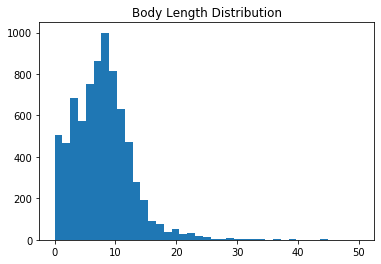

In [7]:
# Hence needs to be scaled
bins =  np.linspace(0,50,40)
pyplot.hist(data['body_per_punct'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

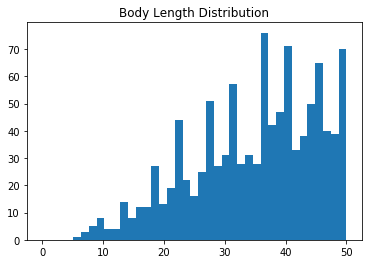

In [8]:
# Hence needs to be scaled
bins =  np.linspace(0,50,40)
pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

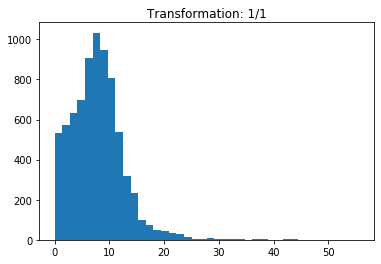

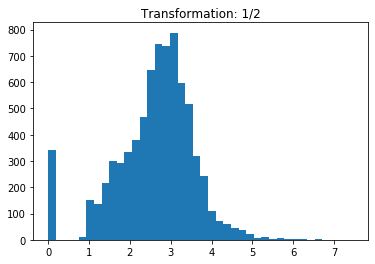

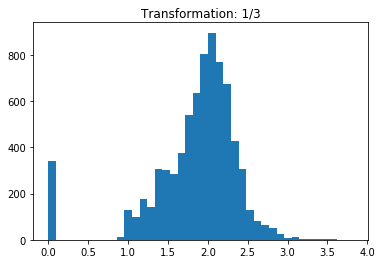

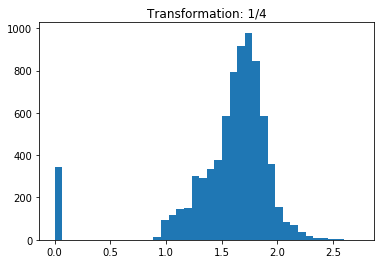

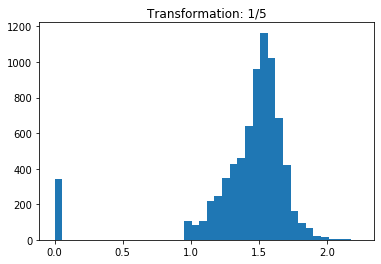

In [9]:
## Scaling
for i in [1,2,3,4,5]:
    bins =  np.linspace(0,60,40)
    pyplot.hist(data['body_per_punct']**(1/i), bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()   

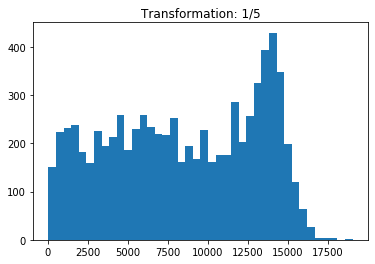

In [10]:
## Scaling
bins =  np.linspace(0,60,40)
pyplot.hist(data['body_len']**(2), bins=40)
pyplot.title("Transformation: 1/{}".format(str(i)))
pyplot.show()   

## Transformation 1/3 for punctuations and 2 for length of text

In [11]:
# Creating the TfIdf term document matrix
Tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_count = Tfidf_vect.fit_transform(data['text_combined'])

X_features = pd.concat([data['body_len'],data['body_per_punct'], pd.DataFrame(X_count.toarray())], axis = 1)

X_features.head()

,body_len,body_per_punct,0,1,2,3,4,5,6,7,...,19562,19563,19564,19565,19566,19567,19568,19569,19570,19571
0,57,1.8,0.242589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,3.1,0.251281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,112,2.7,0.169752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,57,3.5,0.283364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72,2.8,0.226716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelling begins

### Explore random forest classifier through cross validation

In [12]:
## Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

rf =  RandomForestClassifier(n_jobs = -1) # parallel processing: building the individual jobs in parallel
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['target'], cv = k_fold, scoring = 'accuracy', n_jobs = -1)

# the accuracy is bad


array([0.73407748, 0.71240972, 0.667761  , 0.67477004, 0.71550591])

### Through holdout set



In [17]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_features, data['target'], test_size = 0.2)


rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, Y_train)


In [62]:
#sorted(zip(rf_model.feature_importances_, X_train.columns), reverse = True)

In [63]:
Y_pred = rf_model.predict(X_test)

precision,recall,fscore,support = score(Y_test, Y_pred, pos_label = 1, average = 'binary')

print('Precision:{} / Recall:{} / Accuracy: {} / fscore: {}'.format(round(precision,3), round(recall,3), 
                                                                    (Y_pred==Y_test).sum()/len(Y_pred), round(fscore,3)))

Precision:0.976 / Recall:0.303 / Accuracy: 0.6933683519369666 / fscore: 0.463


### Random forest with grid search

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['target'], test_size=0.2)

def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label= 1, average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))


NameError: name 'train_test_split' is not defined

In [77]:
for n_est in [100, 150, 200]:
    for depth in [5, 10, 15, 20, 25, 30, None]:
        train_RF(n_est, depth)
        
# The best ones : Est: 100,150, 200 Depth: None
# Est: 100 / Depth: 30 ---- Precision: 0.967 / Recall: 0.387 / Accuracy: 0.724

Est: 100 / Depth: 5 ---- Precision: 1.0 / Recall: 0.043 / Accuracy: 0.578
Est: 100 / Depth: 10 ---- Precision: 0.991 / Recall: 0.161 / Accuracy: 0.63
Est: 100 / Depth: 15 ---- Precision: 0.983 / Recall: 0.253 / Accuracy: 0.669
Est: 100 / Depth: 20 ---- Precision: 0.99 / Recall: 0.297 / Accuracy: 0.689
Est: 100 / Depth: 25 ---- Precision: 0.975 / Recall: 0.349 / Accuracy: 0.709
Est: 100 / Depth: 30 ---- Precision: 0.967 / Recall: 0.387 / Accuracy: 0.724
Est: 100 / Depth: None ---- Precision: 0.888 / Recall: 0.604 / Accuracy: 0.792
Est: 150 / Depth: 5 ---- Precision: 1.0 / Recall: 0.042 / Accuracy: 0.578
Est: 150 / Depth: 10 ---- Precision: 1.0 / Recall: 0.151 / Accuracy: 0.626
Est: 150 / Depth: 15 ---- Precision: 0.994 / Recall: 0.234 / Accuracy: 0.662
Est: 150 / Depth: 20 ---- Precision: 0.984 / Recall: 0.277 / Accuracy: 0.68
Est: 150 / Depth: 25 ---- Precision: 0.98 / Recall: 0.356 / Accuracy: 0.713
Est: 150 / Depth: 30 ---- Precision: 0.951 / Recall: 0.377 / Accuracy: 0.717
Est: 150 

### Exploring parameter setting using grid search CV

In [74]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [75]:
rf = RandomForestClassifier(n_jobs=-1)
param = {'n_estimators': [100, 150, 200],
        'max_depth': [30, 60, None]}

gs = GridSearchCV(r0f, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_features, data['target'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

KeyboardInterrupt: 

In [81]:
# Gradient boosting with grid search

from sklearn.ensemble import GradientBoostingClassifier

In [83]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

In [ ]:
for n_est in [100, 150]:
    for max_depth in [5, 10,  11, 15]:
        for lr in [0.05, 0.1]:
            train_GB(n_est, max_depth, lr)

Est: 100 / Depth: 5 / LR: 0.05 ---- Precision: 0.825 / Recall: 0.528 / Accuracy: 0.743
Est: 100 / Depth: 5 / LR: 0.1 ---- Precision: 0.833 / Recall: 0.578 / Accuracy: 0.763


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
 
predictions = logmodel.predict(X_test)
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

C:\Users\abhi_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.78      0.90      0.84       860
           1       0.84      0.67      0.75       663

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

[[772  88]
 [217 446]]
0.7997373604727511


In [18]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
model_xgb = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.03, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(X_train, Y_train)

predictions = model_xgb.predict(X_test)


In [25]:
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.72      0.90      0.80       870
           1       0.81      0.54      0.65       653

    accuracy                           0.75      1523
   macro avg       0.77      0.72      0.72      1523
weighted avg       0.76      0.75      0.74      1523

[[786  84]
 [301 352]]
0.747209455022981


In [67]:
test_data = pd.read_csv("test.csv")
test_data.head()

test_data = test_data.replace(np.nan, '', regex=True)
test_data['text'] =  test_data['text']+ " " +test_data['keyword'] 
test_data.head()

,id,keyword,location,text
0,0,,,Just happened a terrible car crash
1,2,,,"Heard about #earthquake is different cities, s..."
2,3,,,"there is a forest fire at spot pond, geese are..."
3,9,,,Apocalypse lighting. #Spokane #wildfires
4,11,,,Typhoon Soudelor kills 28 in China and Taiwan


In [68]:

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round((count/(len(text)-text.count(" "))),3)*100

# Counting the length
test_data['body_len'] = test_data['text'].apply(lambda x: len(x) - x.count(" "))

# Adding punctuation percent column
test_data['body_per_punct'] = test_data['text'].apply(lambda x: count_punct(x)) 

test_data.head()

,id,keyword,location,text,body_len,body_per_punct
0,0,,,Just happened a terrible car crash,29,0.0
1,2,,,"Heard about #earthquake is different cities, s...",56,5.4
2,3,,,"there is a forest fire at spot pond, geese are...",78,2.6
3,9,,,Apocalypse lighting. #Spokane #wildfires,37,8.1
4,11,,,Typhoon Soudelor kills 28 in China and Taiwan,38,0.0


In [69]:
# Creating the TfIdf term document matrix
Tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_count = Tfidf_vect.fit(data['text_combined'])
TestX_count = Tfidf_vect.transform(test_data['text'])

TestX_features = pd.concat([test_data['body_len'],test_data['body_per_punct'], pd.DataFrame(TestX_count.toarray())], axis = 1)

TestX_features.head()
#X_features.head()

,body_len,body_per_punct,0,1,2,3,4,5,6,7,...,19562,19563,19564,19565,19566,19567,19568,19569,19570,19571
0,29,0.0,0.344475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,56,5.4,0.280741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78,2.6,0.234139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37,8.1,0.336012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,38,0.0,0.286586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
predictions = logmodel.predict(TestX_features)
# Saving the final predictions as a dataset
print(predictions)
test_run = pd.concat([test_data['id'], pd.DataFrame(predictions)],axis = 1)


#test_run.head()

#test_run.to_csv("test_run.csv")

[1 0 1 ... 1 1 0]


,id,0
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1


In [76]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)